In [ ]:
## Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf

from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/Introduction_To_Machine_Learning/Linear_Regression/02-Hands-On-01/"
!ls



Mounted at /content/drive
/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/Introduction_To_Machine_Learning/Linear_Regression/02-Hands-On-01
boston.csv  SLR_W1_PracticeExercise_Question.ipynb  SLR_W1_PracticeExercise_Solution.ipynb


In [ ]:
df_boston_original = pd.read_csv('boston.csv')
df_boston_wrking = df_boston_original.copy()

In [ ]:
df_boston_wrking.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
df_boston_wrking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [ ]:
df_boston_wrking.shape

(506, 13)

In [ ]:
df_boston_wrking.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


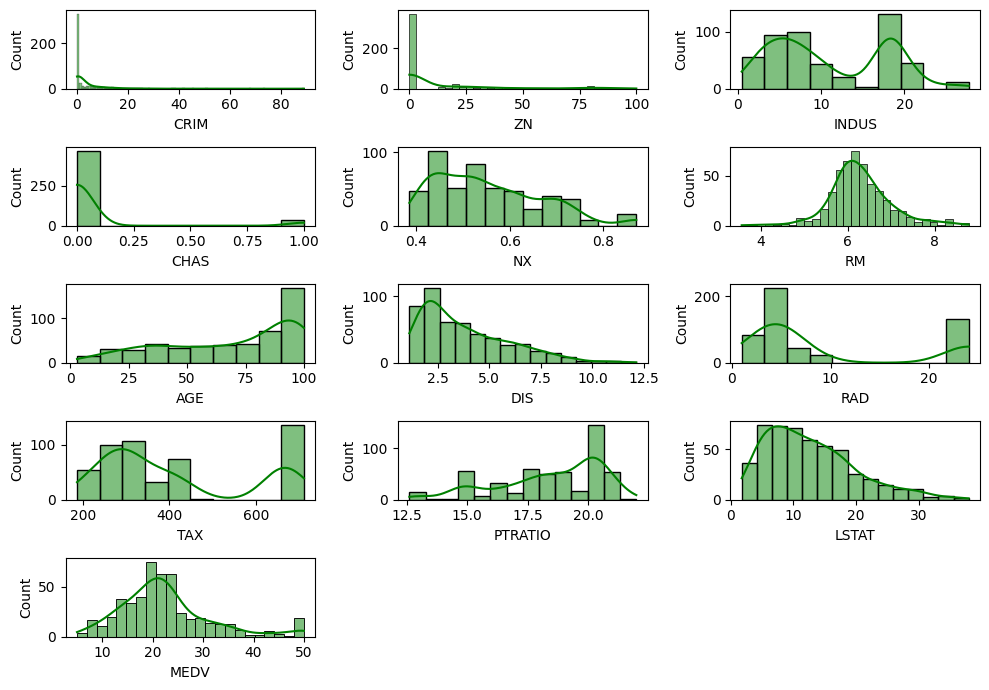

In [ ]:
#Univariate Analysis
plt.figure(figsize=(10,7))
col_features_plt = df_boston_wrking.select_dtypes(include=['int64','float64']).columns
for index, col_plt in enumerate(col_features_plt):
  plt.subplot(5,3, index+1)
  sns.histplot(data=df_boston_wrking, x= col_plt, kde=True, color ='green')

plt.tight_layout()
plt.show()

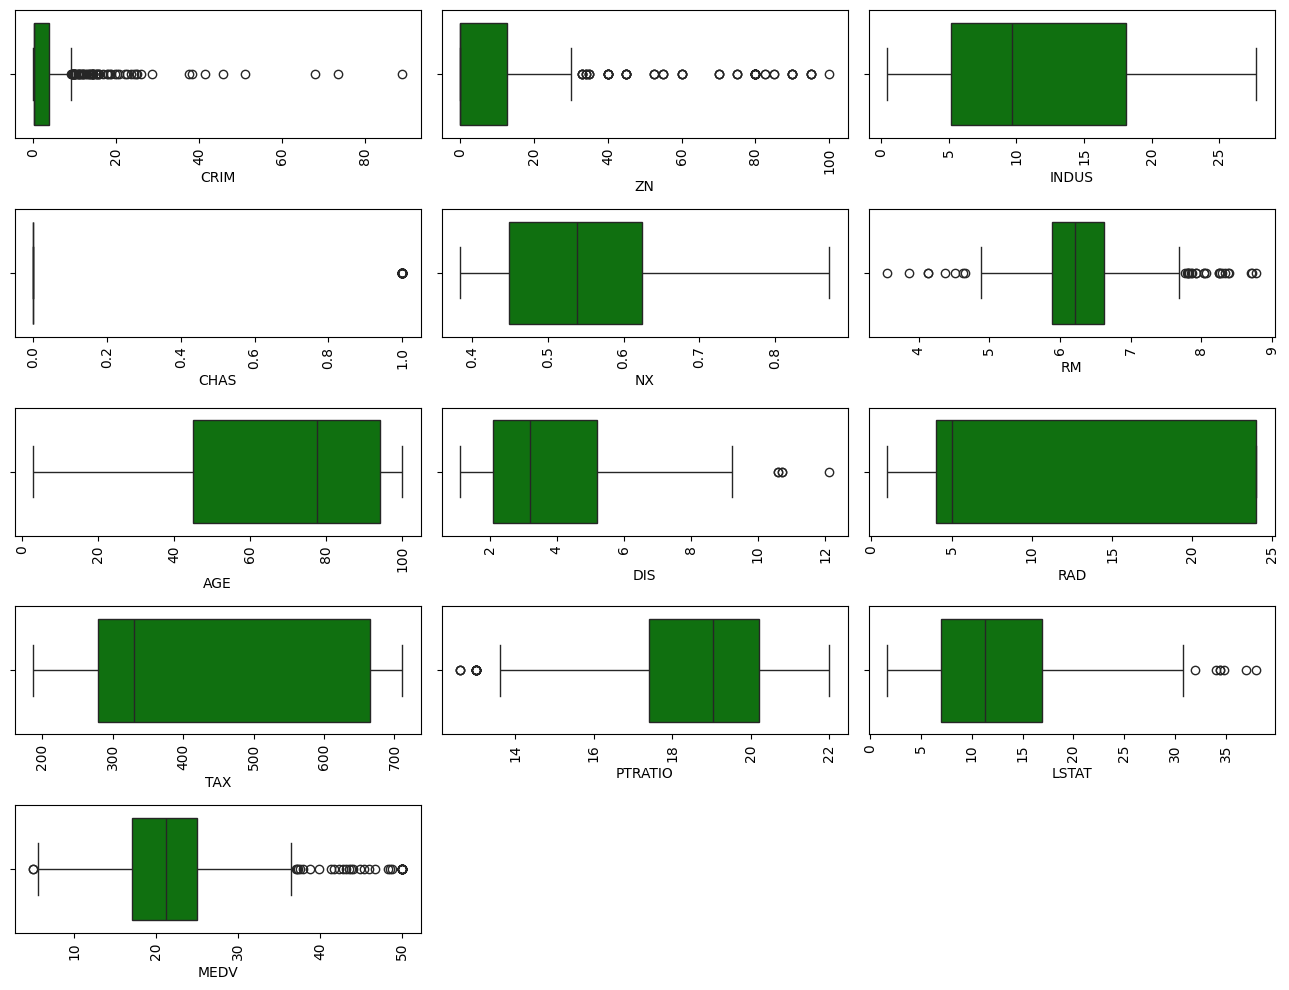

In [ ]:
plt.figure(figsize=(13,10))
col_features_plt = df_boston_wrking.select_dtypes(include=['int64','float64']).columns
for index, col_plt in enumerate(col_features_plt):
  plt.subplot(5,3, index+1)
  sns.boxplot(data=df_boston_wrking,color='green',x=col_plt)
  plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

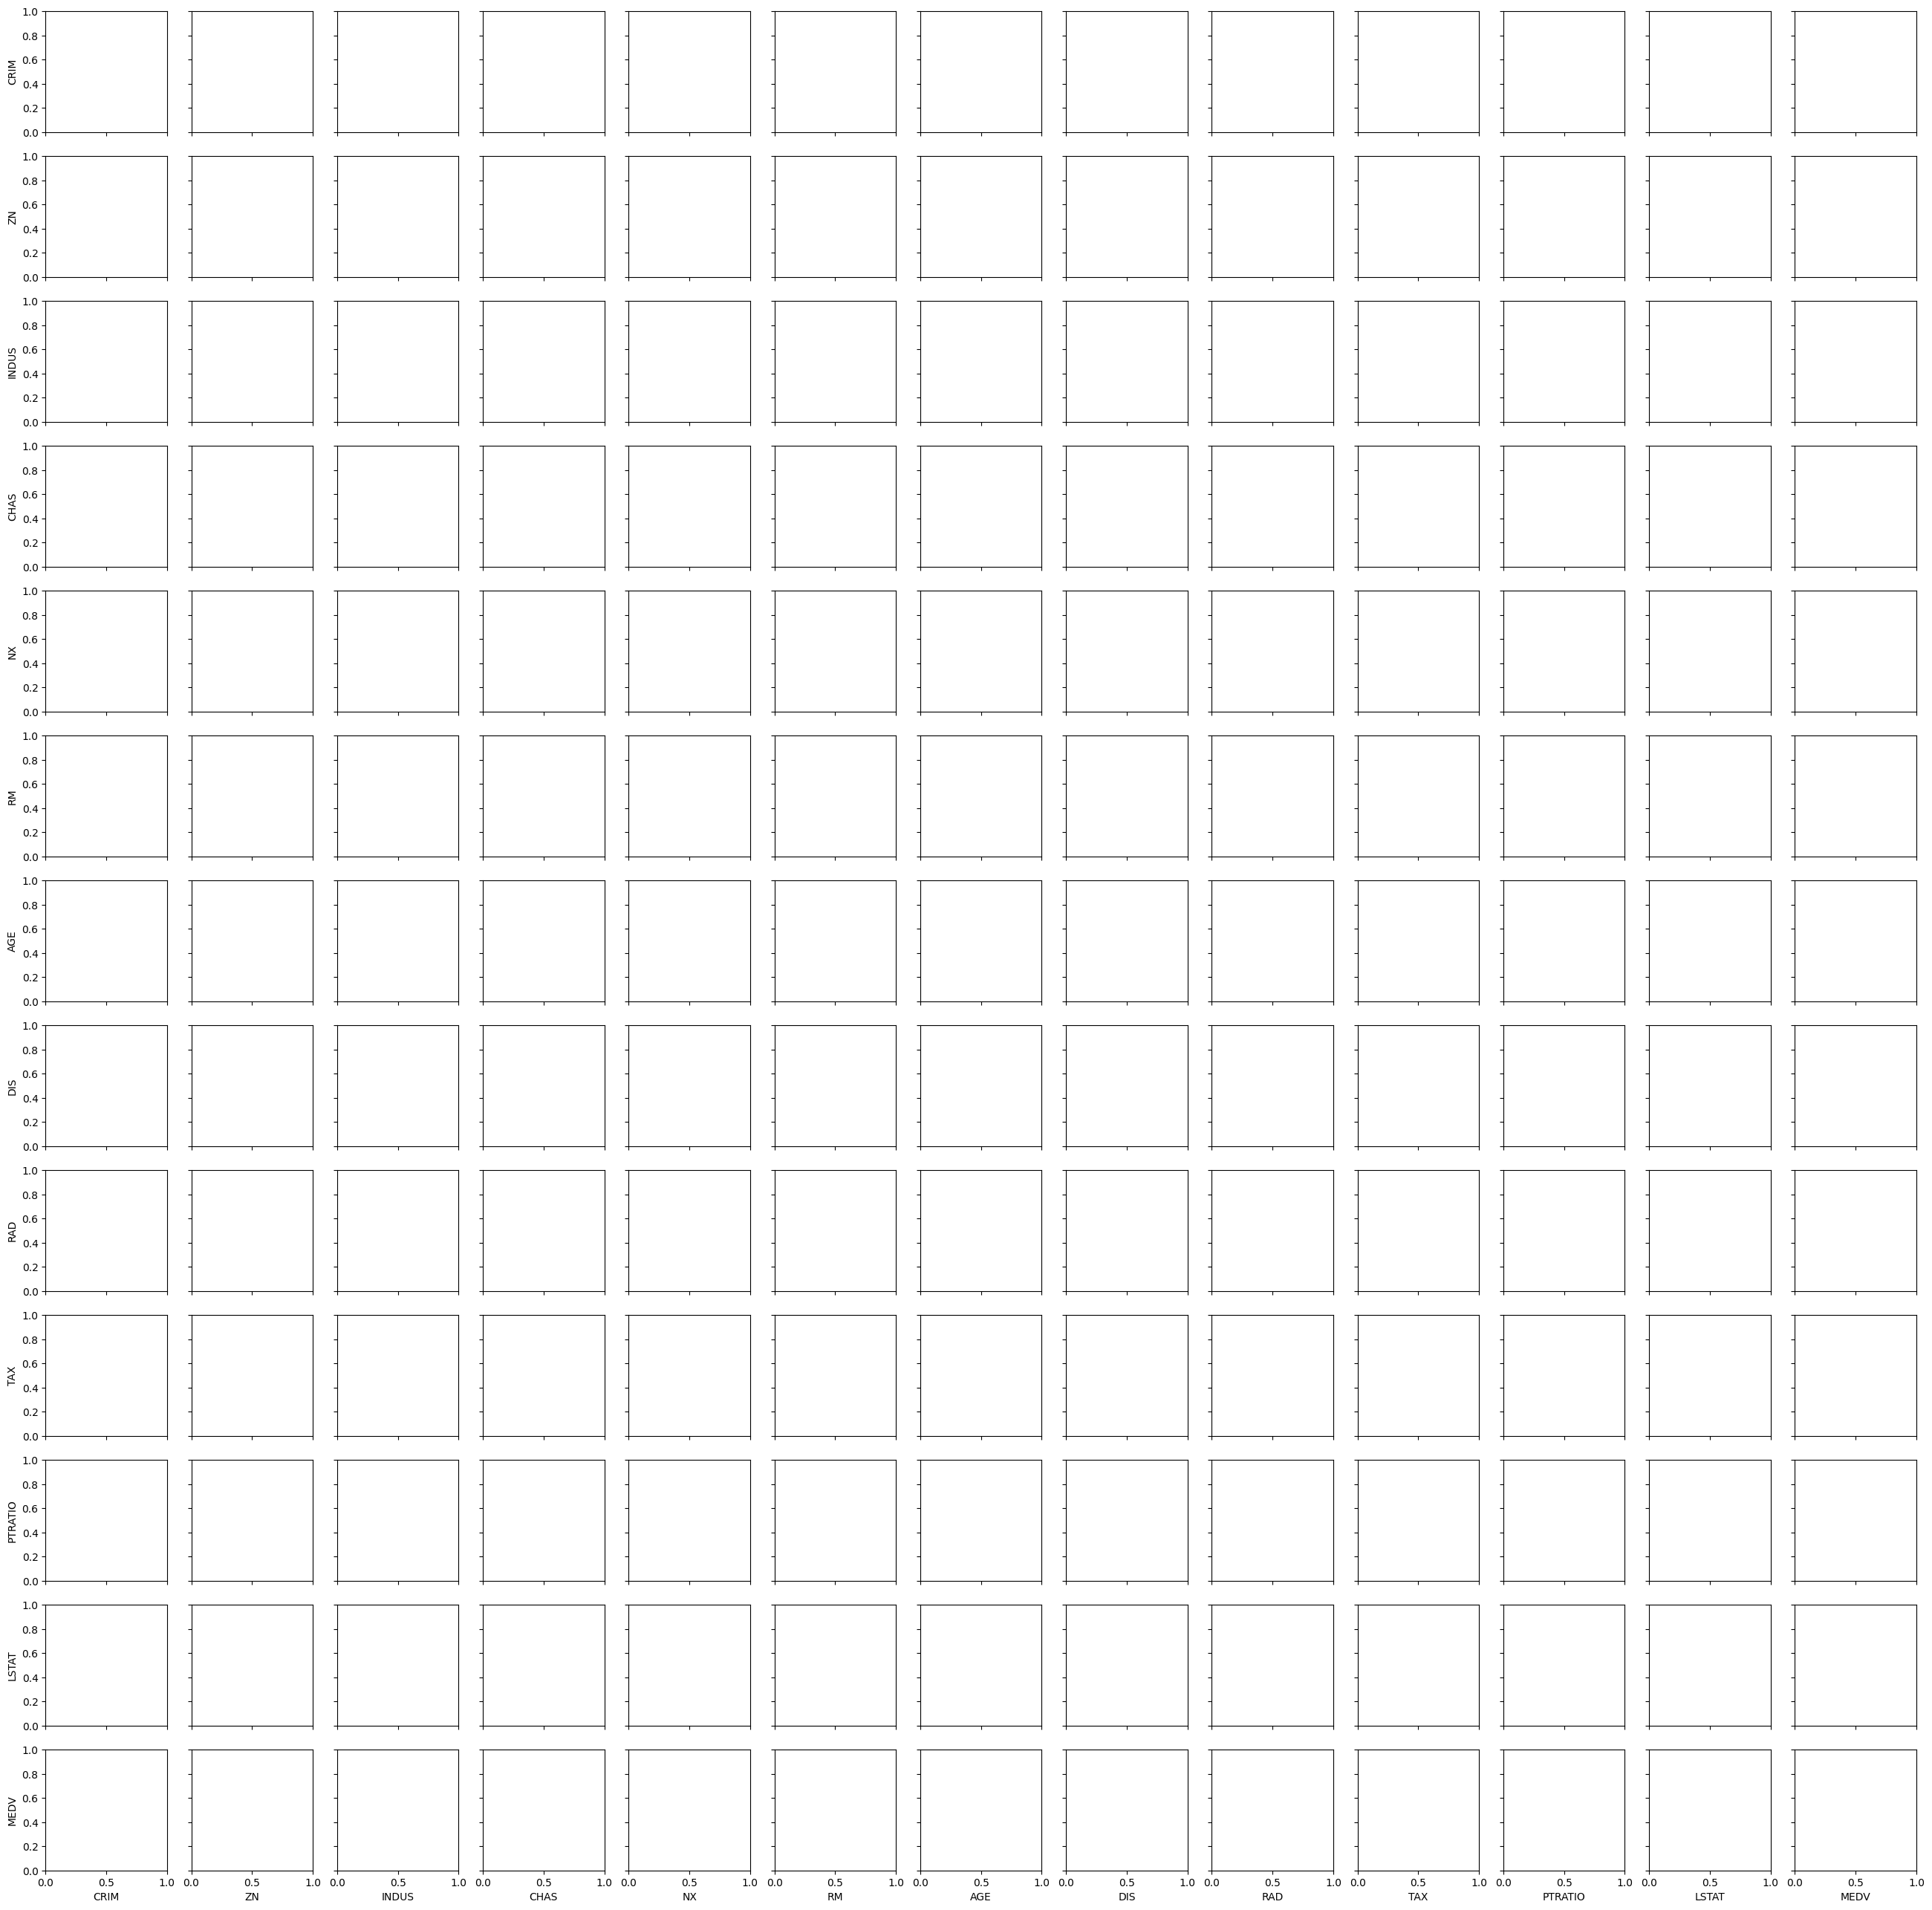

In [ ]:
## Bi variate Analysis
sns.pairplot(df_boston_wrking)

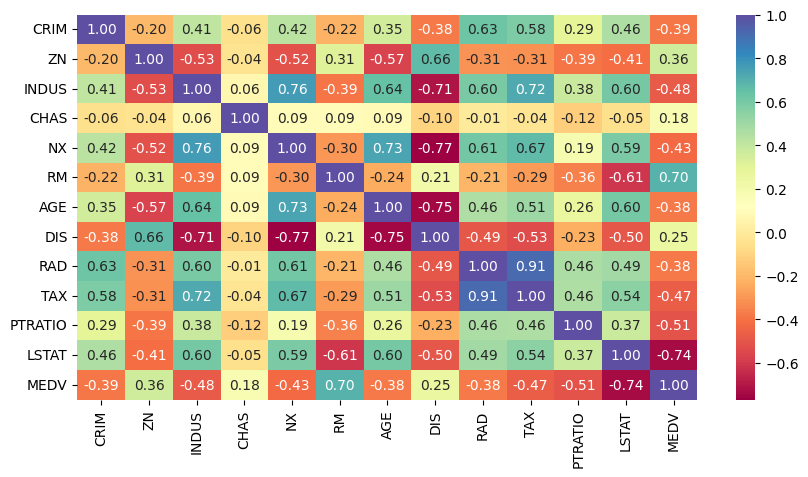

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_boston_wrking.corr(numeric_only=True),annot=True,fmt='.2f',cmap='Spectral')
plt.show()


In [ ]:
from inspect import Attribute
df_Outcomes = df_boston_wrking['MEDV']
df_Attributes = df_boston_wrking.drop('MEDV',axis=1)

Attributes_train, Attributes_test, Outcomes_train, Outcomes_test = train_test_split(df_Attributes, df_Outcomes, test_size=0.2, random_state=20)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(Attributes_train, Outcomes_train)
print(regression_model.intercept_)
print(regression_model.coef_)
regression_model_test = LinearRegression()
regression_model_test.fit(Attributes_test, Outcomes_test)
print(regression_model_test.intercept_)
print(regression_model_test.coef_)
# print(regression_model.score(Attributes_train, Outcomes_train))
# print(regression_model_test.score(Attributes_test, Outcomes_test))



41.37797686505532
[-9.53925664e-02  4.19260523e-02  3.70129012e-02  3.06773300e+00
 -2.26692267e+01  3.61568526e+00  2.21769490e-02 -1.37017464e+00
  2.56327345e-01 -1.14117344e-02 -8.86477234e-01 -5.85823726e-01]
43.78143665352936
[-0.16462899  0.06968514 -0.14140608  0.9222139  -3.51996281  3.88271824
 -0.06574282 -1.96083036  0.57227931 -0.02894749 -1.06504053 -0.37980427]


In [ ]:
Predicated_Outcomes_test_data = regression_model.predict(Attributes_test)
Predicated_Outcomes_test_data

array([20.84917108, 27.5478592 , 19.66724328, 23.82928175, 15.64098036,
       19.92027445, 17.79046389,  5.29712734, 19.07238798, 25.1965888 ,
       27.68566341, 15.50823618, 23.51734412, 21.53426917, 20.04937751,
       25.17927992, 31.11184056, 18.76881252, 14.22855015, 17.35600684,
       38.01694242, 42.51956418, 27.33631302, 32.66388571, 26.43363078,
       26.76717711, 20.11928215, 25.10146375, 21.07780063, 24.41124335,
       21.17866262, 16.95491454, 22.78836502, 11.52414525, 30.13655202,
       23.36260015, 42.31384724, 22.21413655, 19.46747088, 31.14395379,
        7.6695915 , 16.06712718, 14.20327   , 15.08805004, 22.5920533 ,
       28.54959637, 21.54802689, 20.37885469,  8.61039972, 15.20062206,
       34.52249351, 34.4720518 , 11.47070466, 37.45280256, 19.02367838,
       21.65011671, 19.7991027 , 19.67169424, 18.85062168, 23.08793916,
       27.05580734, 19.91950565, 19.13365781, 24.04726527, 17.49754659,
       18.58791082, 27.82424886, 24.54669575, 18.03529486, 16.87

In [ ]:
Predicated_Outcomes_train_data = regression_model.predict(Attributes_train)
Predicated_Outcomes_train_data

array([19.63447929, 38.41114075, 28.4872742 , 11.98492737, 18.94407391,
       13.29682368, 15.31607516, 21.87492662, 24.03515795, 32.63811059,
       20.08306259, 14.37585322, 29.34290265, 34.04819893, 27.70799863,
       18.99702746, 10.59909346, 23.98224908, 34.16946513, 14.88871528,
       10.81325633, 40.23539376, 23.96626141, 17.07208263, 24.37328315,
       44.3951439 , 30.57078288, 21.14691797, 17.65434966, 25.88289257,
       17.12176066, 20.89521019, 32.89199611, 34.77189851, 26.30810833,
       26.15494697, 19.51722438, 27.11032268, 24.43755633, 19.1917521 ,
       24.68608103, 21.50836192, 11.74966159, 28.54420947, 20.2507567 ,
       22.01910618,  9.49246989, 20.45248686, 23.82619109, 16.30460388,
        5.20334814, 17.42207066, 22.02788122, 19.59115612, 20.29048449,
       26.02513138, 30.03450226, 18.78567475, 27.00653636, 35.0083173 ,
        4.95771303, 16.80123808, 14.64992909, 27.41072805, 31.04321781,
       18.25407721, 19.20089807, 30.40208192, 14.36071216, 42.41

In [ ]:
def Model_Prediction(model, attribute_data, outcome_data):
  outcome_mean = outcome_data.mean()
  print("Outcome_Mean: ",outcome_mean)


def Model_Metrics(Actual_outcome_train,Predicated_Outcomes_train):
  error_np = np.subtract(Actual_outcome_train,Predicated_Outcomes_train)
  error_np_mean = error_np.mean()


  error_abs = np.absolute(error_np)
  error_sq = np.square(error_np)

  varian = Actual_outcome_train-Actual_outcome_train.mean()
  actual_sq =  np.square(varian)
  actual_sq_mean = actual_sq.mean()

  r2_score_cus_fun = 1 - (error_sq.sum()/actual_sq.sum())

  MSE = error_sq.mean()
  MAE = error_abs.mean()

  print("Mean Square Error: ",MSE)
  print("Mean Absolute Error: ",MAE)
  print("R2 Score: ",r2_score_cus_fun)

  return MSE, MAE, r2_score_cus_fun

#MSE,MAE = regression_model.predict(Attributes_train)
MSE,MAE,r2_score_cus = Model_Metrics(Outcomes_train,Predicated_Outcomes_train_data)
print("Mean Square Error: ",MSE)
print("Mean Absolute Error: ",MAE)

MSE,MAE,r2_score_cus = Model_Metrics(Outcomes_test,Predicated_Outcomes_test_data)
print("Mean Square Error: ",MSE)
print("Mean Absolute Error: ",MAE)


Mean Square Error:  24.05914871418716
Mean Absolute Error:  3.463841317012959
R2 Score:  0.7303038609786612
Mean Square Error:  24.05914871418716
Mean Absolute Error:  3.463841317012959
Mean Square Error:  17.022650880336837
Mean Absolute Error:  3.151919583575108
R2 Score:  0.7356954383735992
Mean Square Error:  17.022650880336837
Mean Absolute Error:  3.151919583575108


In [ ]:
r2 = r2_score(Outcomes_test,Predicated_Outcomes_test_data)
print(r2)

mse = mean_squared_error(Outcomes_test,Predicated_Outcomes_test_data)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

In [ ]:
Attributes_test
Outcomes_test

## TENSOR FLOW MODEL

In [ ]:
scaler = StandardScaler()
Attributes_train_scaled = scaler.fit_transform(Attributes_train)
Attributes_test_scaled = scaler.transform(Attributes_test)

# model = tf.keras.Sequential([tf.keras.layers.Dense(10, input_shape=[Attributes_train_scaled.shape[1]])])
# model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])
# ##tf_linear_regression_model = model.fit(Attributes_train_scaled, Outcomes_train, epochs=100, validation_split=0.2)
# ##tf_linear_regression_model = model.fit(Attributes_train_scaled, Outcomes_train, epochs=100, validation_data=(Attributes_test_scaled, Outcomes_test)
# model.fit(Attributes_train_scaled, Outcomes_train, epochs=1)
# model.summary()

# outcome_test_Prediction = model.predict(Attributes_test_scaled)
# outcome_test_Prediction.flatten()

# df_Outcomes_Result = pd.DataFrame({'Outcomes': Outcomes_test, 'Prediction': outcome_test_Prediction.flatten()})

# df_Outcomes_Result


In [ ]:
scaler = StandardScaler()
Attributes_train_scaled = scaler.fit_transform(Attributes_train)
Attributes_test_scaled = scaler.transform(Attributes_test)

# Define the model with a single output neuron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[Attributes_train_scaled.shape[1]]),
    tf.keras.layers.Dense(1) # Add a dense layer with 1 output neuron
])

model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

model.fit(Attributes_train_scaled, Outcomes_train, epochs=100,validation_split=0.2)
model.summary()


In [ ]:

outcome_test_Prediction = model.predict(Attributes_test_scaled)

# Flatten the prediction to get a 1D array
outcome_test_Prediction = outcome_test_Prediction.flatten()

df_Outcomes_Result = pd.DataFrame({'Outcomes': Outcomes_test, 'Prediction': outcome_test_Prediction})

print(df_Outcomes_Result)

# Mean Squared Error
mse = mean_squared_error(Outcomes_test, outcome_test_Prediction)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(Outcomes_test, outcome_test_Prediction))

# Mean Absolute Error
mae = mean_absolute_error(Outcomes_test, outcome_test_Prediction)

# R-squared
r_squared = r2_score(Outcomes_test, outcome_test_Prediction)

# Adjusted R-squared
n = len(Outcomes_test)
p = Attributes_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


In [ ]:
import pandas as pd


df_comparestudy =df_boston_original.copy()

# Features and target
X = df_comparestudy.drop(columns=['MEDV'])
y = df_comparestudy['MEDV']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

# Make predictions
y_pred_sklearn = model_sklearn.predict(X_test)

# Calculate metrics
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)
r_squared_sklearn = r2_score(y_test, y_pred_sklearn)

# Print metrics
print("Scikit-Learn Linear Regression")
print("Mean Squared Error:", mse_sklearn)
print("Root Mean Squared Error:", rmse_sklearn)
print("Mean Absolute Error:", mae_sklearn)
print("R-squared:", r_squared_sklearn)


Scikit-Learn Linear Regression
Mean Squared Error: 22.777708563866078
Root Mean Squared Error: 4.772599769922686
Mean Absolute Error: 3.1113773882381817
R-squared: 0.6893967884614756


In [ ]:
import tensorflow as tf

# Define the model
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[X_train.shape[1]])
])

# Compile the model
model_tf.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model
model_tf.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Make predictions
y_pred_tf = model_tf.predict(X_test)
y_pred_tf = y_pred_tf.flatten()  # Ensure y_pred_tf is a 1D array

# Calculate metrics
mse_tf = mean_squared_error(y_test, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
mae_tf = mean_absolute_error(y_test, y_pred_tf)
r_squared_tf = r2_score(y_test, y_pred_tf)

# Print metrics
print("TensorFlow Linear Regression")
print("Mean Squared Error:", mse_tf)
print("Root Mean Squared Error:", rmse_tf)
print("Mean Absolute Error:", mae_tf)
print("R-squared:", r_squared_tf)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 560.4087 - val_loss: 349.7694
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 331.2233 - val_loss: 228.0183
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 205.4640 - val_loss: 152.4184
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 137.7321 - val_loss: 105.0824
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 96.5434 - val_loss: 74.5687
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 65.6049 - val_loss: 56.4010
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57.5637 - val_loss: 43.9260
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43.1103 - val_loss: 37.3342
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.3786 - val_loss: 32.6862
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.9493 - val_loss: 29.6968
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28.7722 - val_loss: 27.6528
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7